In [1]:
import os,re
HostName=os.uname()[1]
print (HostName)

import vresult_data_com as vrc
import vresult_data_reward as vdr
import config as sc
#system_name="Sell300"
system_name="Buy300_2C"
process_name="EvalAgent_0"
Lstock, LEvalT, LYM, lgc=vrc.get_addon_setting(system_name,process_name)
i0=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)
process_name="EvalAgent_2"
i1=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)

homeserver
current EvalT from 250 to 9750 specify end Eval(Y/N)?N


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
i0.show_reward(fig, 250,[],[])
plt.show()

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
i1.show_reward(fig, 250,[],[])
plt.show()

            trans_id  trans_start  trans_end  reward  duration  buy_price  \
0        SH601012_T1     20200228   20200306 -0.0274         6      31.70   
1       SH601012_T10     20200305   20200306  0.0010         2      30.80   
2       SH601012_T11     20200514   20200519  0.0480         4      31.43   
3       SH601012_T12     20200320   20200327 -0.1000         6      24.20   
4       SH601012_T13     20200313   20200316 -0.0012         2      26.80   
...              ...          ...        ...     ...       ...        ...   
131253  SZ300124_T49     20200414   20200416  0.0001         3      29.30   
131254  SH600066_T47     20200323   20200325  0.0663         3      12.20   
131255  SH600066_T48     20200108   20200115  0.0164         6      14.37   
131256  SZ300498_T68     20200429   20200430  0.0133         2      29.61   
131257  SZ300498_T69     20200306   20200313 -0.1000         6      37.61   

        sell_price  valid_trans_kpi  buy_count  flag_trans_valid     stock 

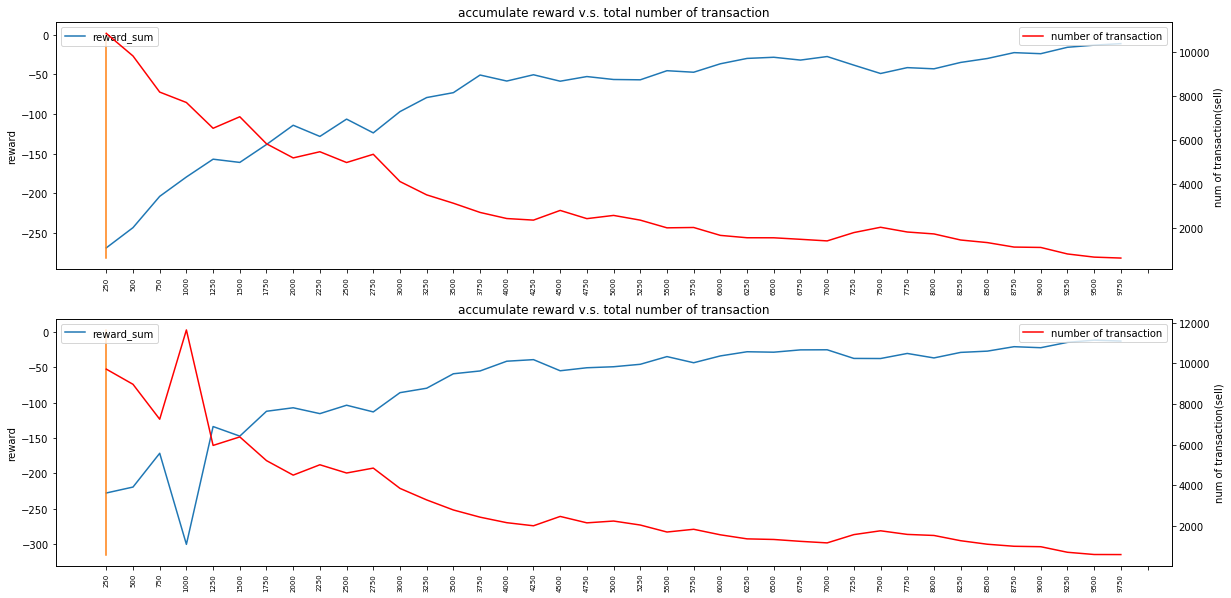

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
fig.add_subplot(211)
fig.add_subplot(212)
allaxes = fig.get_axes()
i0.plot_reward_count(allaxes[0], 250)
i1.plot_reward_count(allaxes[1], 250)
plt.show()


In [31]:
#Estimate V3 failed sell transaction rough mean reward
dft=i1.df[i1.df["valid_trans_kpi"]!=1.0]
mean_reward=((dft["sell_price"]-dft["buy_price"])/dft["buy_price"]).mean()
print (mean_reward) 
#Set the V3 fail sell transaction to rough mean reward
#i1.df.loc[i1.df["valid_trans_kpi"]!=1,"reward"]=mean_reward


-0.029664634710529204


In [59]:
#eval one evalcount trans number on per stock
import pandas as pd
dft=i1.df[i1.df["valid_trans_kpi"]==1.0]
dftt=dft[dft["EvalT"]==6750]
dfttt=dftt[["stock","reward"]].groupby("stock").\
            agg(reward=pd.NamedAgg(column="reward", aggfunc="sum"),
                count=pd.NamedAgg(column="reward",aggfunc="count")
                )
print (dfttt["count"].describe())
print (dfttt["count"].sum())
print (dfttt[dfttt["count"]==dfttt["count"].min()])

count    264.000000
mean      65.825758
std        8.902511
min       44.000000
25%       59.000000
50%       66.000000
75%       72.000000
max       84.000000
Name: count, dtype: float64
17378
          reward  count
stock                  
SH601919  0.4051     44


In [30]:
#to show specific evalT and stock tranactions
import pandas as pd
import prettytable as pt

def PrintPerEvalPerStock(EvalT,Stock,df):
    print ("Stock={0} Eval={1}".format(Stock,EvalT),end='')
    dfr=df[(df["EvalT"]==EvalT)&(df["stock"]==Stock)]
    if len(dfr)==0:
        print ("No transaction for {0} {1}".format(Stock,EvalT))
        return
    
    field_names=['trans_start', 'trans_end', 'reward','buy_price', 'sell_price', 'valid_trans_kpi']
    dfr=dfr[field_names]
    tb=pt.PrettyTable()
    tb.field_names=field_names
    print ("accumulate reward is {0:.2f}".format(dfr["reward"].sum()))
    for idx,row in dfr.iterrows():
        tb.add_row(row)
    print (tb)

Stock="SH600000"
for EvalT in list(range(5000,9250,250)):
    PrintPerEvalPerStock(EvalT,Stock,i1.df)

Stock=SH600000 Eval=5000accumulate reward is -0.46
+-------------+------------+--------+-----------+--------------------+-----------------+
| trans_start | trans_end  | reward | buy_price |     sell_price     | valid_trans_kpi |
+-------------+------------+--------+-----------+--------------------+-----------------+
|  20200109.0 | 20200116.0 |  -0.1  |   12.41   |       12.384       |       0.5       |
|  20200115.0 | 20200122.0 |  -0.1  |   12.41   | 12.107999999999999 |       0.5       |
|  20200210.0 | 20200217.0 |  -0.1  |   10.77   |       10.856       |       0.5       |
|  20200213.0 | 20200218.0 | 0.0241 |   10.85   |       11.13        |       1.0       |
|  20200311.0 | 20200318.0 |  -0.1  |   10.86   |       10.55        |       0.5       |
|  20200324.0 | 20200327.0 | 0.0192 |   10.04   |       10.25        |       1.0       |
|  20200512.0 | 20200519.0 |  -0.1  |   10.41   |       10.338       |       0.5       |
+-------------+------------+--------+-----------+----------

Stock=SH600000 Eval=8750accumulate reward is -0.34
+-------------+------------+---------+-----------+--------------------+-----------------+
| trans_start | trans_end  |  reward | buy_price |     sell_price     | valid_trans_kpi |
+-------------+------------+---------+-----------+--------------------+-----------------+
|  20200113.0 | 20200120.0 |   -0.1  |   12.35   | 12.330000000000002 |       0.5       |
|  20200114.0 | 20200121.0 | -0.0358 |   12.56   |       12.13        |       1.0       |
|  20200312.0 | 20200319.0 |   -0.1  |    10.7   |       10.446       |       0.5       |
|  20200512.0 | 20200519.0 |   -0.1  |   10.41   |       10.338       |       0.5       |
+-------------+------------+---------+-----------+--------------------+-----------------+
Stock=SH600000 Eval=9000accumulate reward is -0.38
+-------------+------------+--------+-----------+--------------------+-----------------+
| trans_start | trans_end  | reward | buy_price |     sell_price     | valid_trans_kpi |


In [24]:
#Ana on finished and unfinished transaction per EvalT

import prettytable as pt
def unfinished_tran(EvalT,df):
    dfr=df[df["EvalT"]==EvalT]
    Buy_Count=len(dfr)
    Sell_Count=len(dfr[~(dfr["valid_trans_kpi"]!=1)])
    Unfinished_Count=len(dfr[dfr["valid_trans_kpi"]!=1])
    reward_sum=dfr["reward"].sum()
    adj_reward_sum = reward_sum+Unfinished_Count*0.07
    return [EvalT,Buy_Count,Sell_Count,Unfinished_Count,"{0:.2f}".format(reward_sum),"{0:.2f}".format(adj_reward_sum),
            "{0:.4f}".format(adj_reward_sum/Buy_Count),"{0:.4f}".format(adj_reward_sum/Sell_Count)]

tb = pt.PrettyTable()
tb.field_names = ["EvalT","Buy Count","Sell Count", "Unfinished Count","Reward","Adj_reward","RewardPerBuy","RewardPerSell"]

for ET in list(range(250,10000,250)):
    tb.add_row(unfinished_tran(ET,i1.df))       
print(tb)

+-------+-----------+------------+------------------+---------+------------+--------------+---------------+
| EvalT | Buy Count | Sell Count | Unfinished Count |  Reward | Adj_reward | RewardPerBuy | RewardPerSell |
+-------+-----------+------------+------------------+---------+------------+--------------+---------------+
|  250  |    9713   |    6254    |       3459       | -227.95 |   14.18    |    0.0015    |     0.0023    |
|  500  |    8968   |    5752    |       3216       | -219.56 |    5.56    |    0.0006    |     0.0010    |
|  750  |    7252   |    4668    |       2584       | -171.76 |    9.12    |    0.0013    |     0.0020    |
|  1000 |   11640   |    7333    |       4307       | -300.65 |    0.84    |    0.0001    |     0.0001    |
|  1250 |    5964   |    3902    |       2062       | -133.94 |   10.40    |    0.0017    |     0.0027    |
|  1500 |    6382   |    4136    |       2246       | -147.49 |    9.73    |    0.0015    |     0.0024    |
|  1750 |    5217   |    342

In [29]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

